In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [197]:
df = pd.read_csv('cancer patient data sets.csv')

# Data Exploration

In [198]:
df.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,19,P115,14,1,2,4,5,6,5,5,...,5,3,2,1,4,7,2,1,6,Medium
1,35,P13,14,1,2,4,5,6,5,5,...,5,3,2,1,4,7,2,1,6,Medium
2,130,P215,14,1,2,4,5,6,5,5,...,5,3,2,1,4,7,2,1,6,Medium
3,241,P315,14,1,2,4,5,6,5,5,...,5,3,2,1,4,7,2,1,6,Medium
4,352,P415,14,1,2,4,5,6,5,5,...,5,3,2,1,4,7,2,1,6,Medium
5,574,P615,14,1,2,4,5,6,5,5,...,5,3,2,1,4,7,2,1,6,Medium
6,685,P715,14,1,2,4,5,6,5,5,...,5,3,2,1,4,7,2,1,6,Medium
7,796,P815,14,1,2,4,5,6,5,5,...,5,3,2,1,4,7,2,1,6,Medium
8,907,P915,14,1,2,4,5,6,5,5,...,5,3,2,1,4,7,2,1,6,Medium
9,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium


In [199]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.00000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,36.97400,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,11.56508,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.00000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.75000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.00000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.00000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,65.00000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [200]:
df.describe(include = 'object')

,Patient Id,Level
count,1000,1000
unique,1000,3
top,P115,High
freq,1,365


In [201]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'smoking', 'obesity',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  smoking                   1000 non-null   int64 
 12  obesity                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [203]:
df.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
smoking                     0
obesity                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [204]:
df = df.drop(['index'], axis = 'columns', inplace=False)
df = df.drop(['Patient Id'], axis = 'columns',inplace=False)

In [205]:
df = df.sample(frac = 1).reset_index(drop=True)


In [206]:
df.drop_duplicates(inplace=True)

In [207]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


In [208]:
df.shape

(152, 24)

# Data Visualization

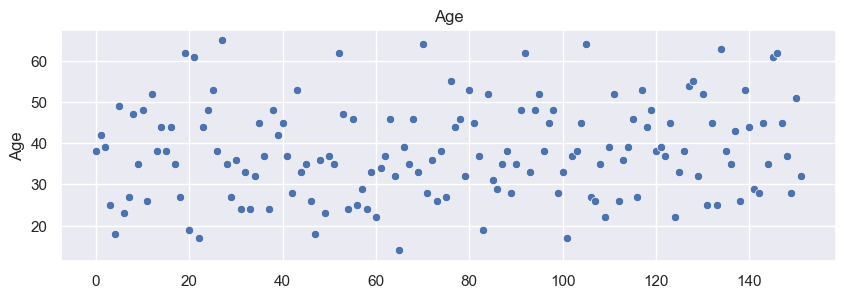

In [209]:
# Plotting Scatter_Plot
#plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10 , 3)
sns.scatterplot(df['Age'])
plt.title('Age')
plt.show()

In [210]:
df.isnull()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,smoking,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
150,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [211]:
df=df.replace({'Level':{'Low': 1, 'Medium': 2, 'High': 3}})

In [212]:
df.dtypes

Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
smoking                     int64
obesity                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
Level                       int64
dtype: object

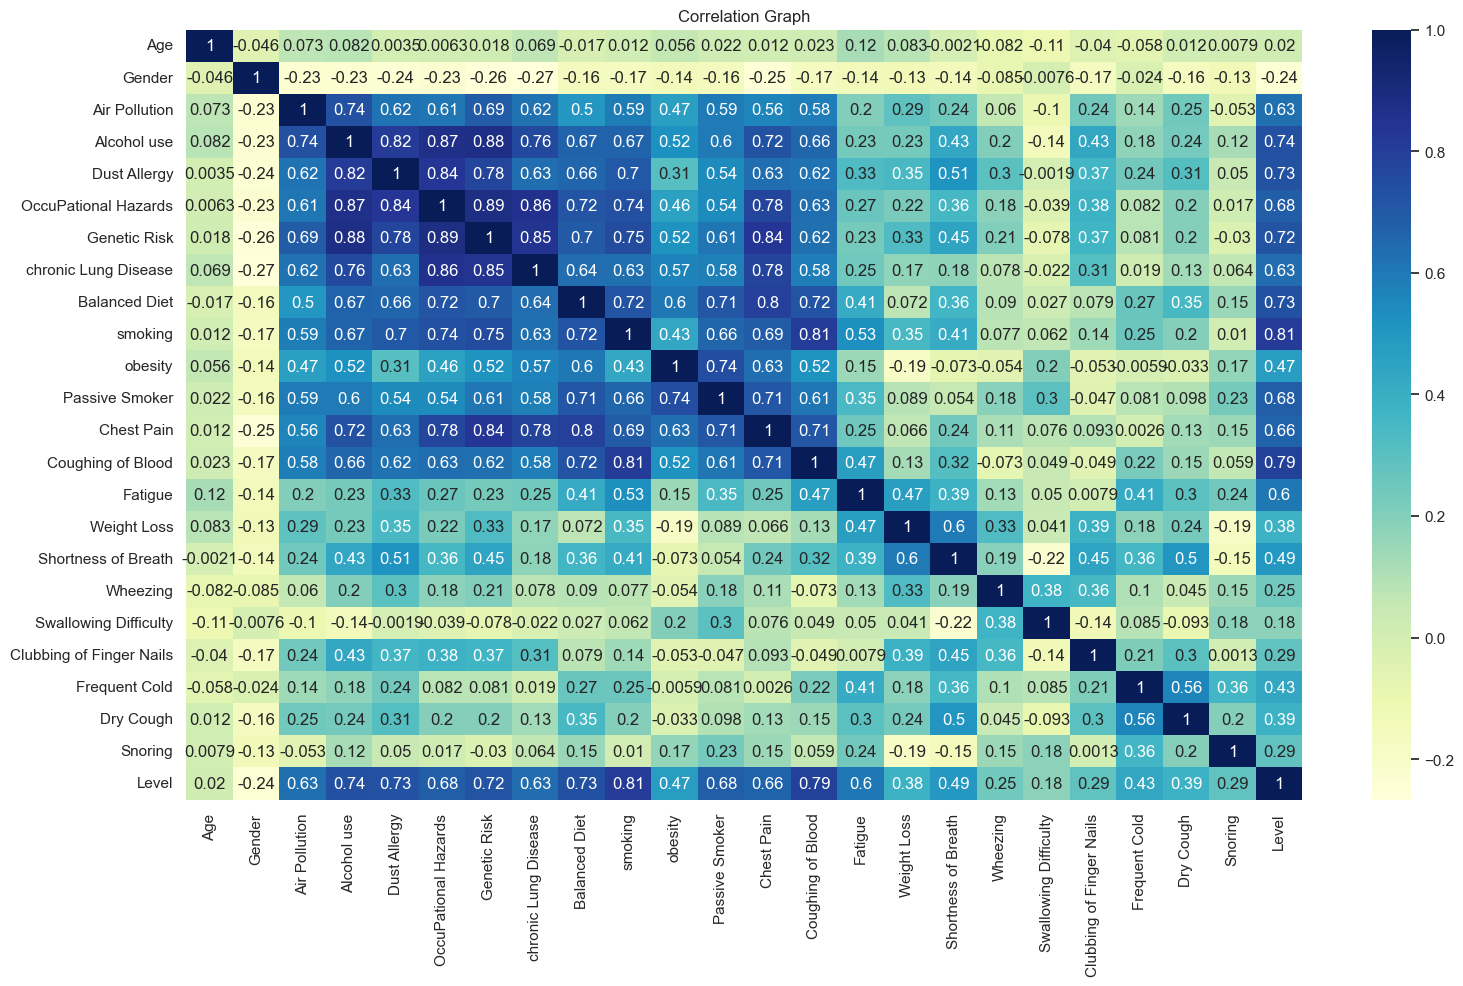

In [213]:
sns.set()
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.title('Correlation Graph')
plt.show()

<Axes: >

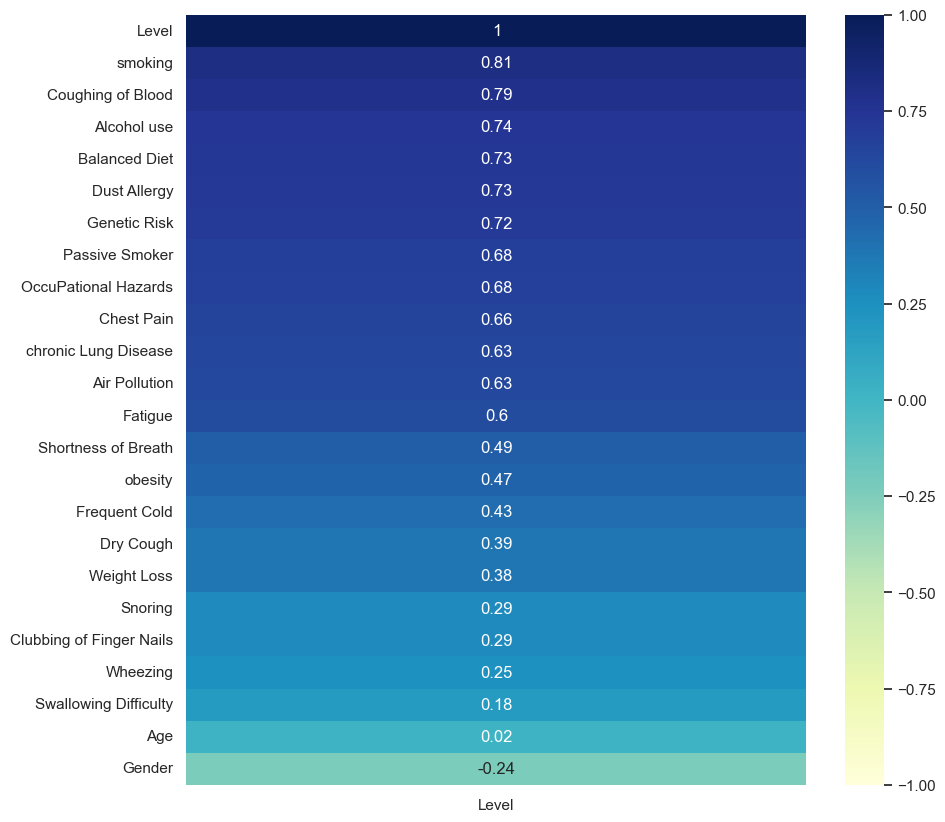

In [214]:
# Plotting the heatmap to check the correlation between the Target Label and other features
plt.rcParams['figure.figsize'] = (10 , 10)
sns.heatmap(df.corr()[['Level']].sort_values(by='Level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')


In [215]:
df.drop(df[df.Age > 64 ].index, inplace=True)

<Axes: title={'center': 'Age'}, xlabel='Level'>

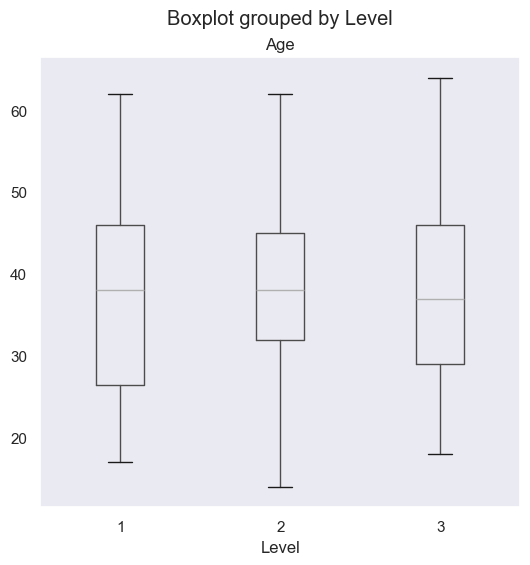

In [216]:
plt.rcParams['figure.figsize'] = (6 , 6)
df.boxplot(by='Level', column = ['Age'],grid=False)


<Axes: ylabel='Age'>

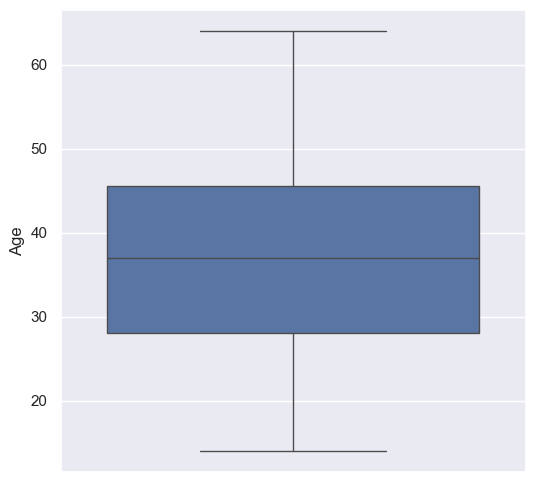

In [217]:
sns.boxplot(df['Age'])


In [218]:
p25 = df['Age'].quantile(0.25)
p75 = df['Age'].quantile(0.75)
iqr = p75-p25
upper_limit = p75 + 1.5*iqr
lower_limit = p25 - 1.5*iqr
df[df['Age'] > upper_limit]
df[df['Age'] < lower_limit]



,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,smoking,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level


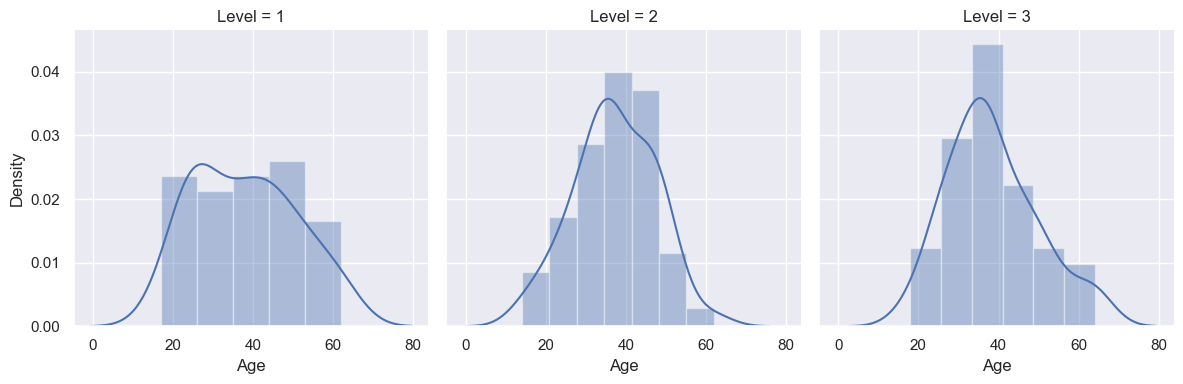

In [219]:
sea = sns.FacetGrid(df,col='Level', height = 4)
sea.map(sns.distplot, "Age")

# Data Preprocessing

In [220]:
#Before Train Test Split, split X(Input) & y(target) from the original Dataframe

X = df.drop(['Level'], axis = 'columns')
y = df['Level']

In [221]:
X.shape, y.shape

((151, 23), (151,))

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [223]:
y_train.value_counts()

3    43
1    40
2    37
Name: Level, dtype: int64

In [224]:
y_test.value_counts()

2    14
3    10
1     7
Name: Level, dtype: int64

In [225]:
#Feature Scaling using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_new_scaled = scaler.fit_transform(X_train)
X_test_new_scaled = scaler.transform(X_test)

In [226]:
df.head(10)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,smoking,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,38,2,5,2,3,1,2,3,5,2,...,1,1,1,1,1,3,2,4,2,1
1,42,1,2,4,5,6,5,5,4,6,...,8,7,7,3,8,9,1,6,2,3
2,39,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3
3,25,2,3,1,4,3,2,3,4,3,...,3,2,2,4,2,2,3,4,3,1
4,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3
5,49,1,6,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
6,23,1,3,2,4,2,3,2,3,3,...,4,5,6,5,5,4,6,5,4,2
7,27,2,3,1,4,2,3,2,3,3,...,2,2,3,4,1,5,2,6,2,1
8,47,2,2,3,1,3,2,5,2,1,...,3,2,1,2,3,1,3,4,2,1
9,35,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3


In [227]:
#Applying Principal Component Analysis (PCA) for dimentionality Reduction

from sklearn.decomposition import PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_new_scaled)
X_test_pca = pca.transform(X_test_new_scaled)

In [228]:
X_train_new_scaled.shape ,X_test_new_scaled.shape

((120, 23), (31, 23))

In [229]:
X_train_pca.shape, X_test_pca.shape

((120, 14), (31, 14))

In [230]:
#Class Imbalance Handling using SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_pca, y_test)

In [231]:
X_train_resampled.shape, y_train_resampled.shape

((129, 14), (129,))

In [232]:
X_test_resampled.shape, y_test_resampled.shape

((42, 14), (42,))

In [233]:
y_train_resampled.value_counts()

2    43
1    43
3    43
Name: Level, dtype: int64

In [234]:
y_test_resampled.value_counts()

1    14
3    14
2    14
Name: Level, dtype: int64

# Model Building and Training

In [235]:
#Import Necessary Algorithm for train the model

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


log_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(min_samples_split = 30)
svm_model = SVC()
gnb_model = GaussianNB()
knn_model = KNeighborsClassifier()

In [236]:
models = [
    log_model,
    dt_model,
    rf_model,
    svm_model,
    gnb_model,
    knn_model
]

In [237]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate_models(models, X, y, cv):
    scores = {}
    for model in models:
        model_name = model.__class__.__name__
        cv_scores = cross_val_score(model, X, y, cv=cv)
        scores[model_name] = cv_scores.mean()
    return scores

In [238]:
cv_scores = train_and_evaluate_models(models, X_train_resampled, y_train_resampled, 20)

In [239]:
# Assuming 'scores' is the dictionary of scores
CV_scores_df = pd.DataFrame.from_dict(cv_scores, orient='index', columns=['Score'])

# Display the DataFrame
print(CV_scores_df)

                           Score
LogisticRegression      0.941667
DecisionTreeClassifier  0.886905
RandomForestClassifier  0.922619
SVC                     0.939286
GaussianNB              0.969048
KNeighborsClassifier    0.938095


# Final Evaluation

In [240]:
best_models = [
    log_model,
    dt_model,
    rf_model,
    svm_model,
    knn_model
]

In [241]:
from sklearn.metrics import accuracy_score

In [242]:
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    scores = {}
    for model in models:
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        score = model.score(X_test, y_test)
        scores[model_name] = {
            'accuracy_score': accuracy,
            'score': model.score(X_test, y_test)
        }
    return scores

In [243]:
scores = train_and_evaluate_models(best_models, X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled)

In [244]:
df_scores = pd.DataFrame(scores)

In [245]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def train_and_evaluate_models(models, X_train, y_train, X_test, y_test, cv):
    scores = {}
    for model in models:
        model_name = model.__class__.__name__
        
        # Perform cross-validation on the training data
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv).mean()
        
        
        # Train the model on the entire training set
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate accuracy score on the test set
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the cross-validation scores in the 'scores' dictionary
        scores[model_name] = {
            'cross_val_scores': cv_scores,
            'test_accuracy_score': accuracy
        }
    return scores


In [246]:
score = train_and_evaluate_models(best_models, X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, 5)

In [247]:
df_sc = pd.DataFrame(score)

In [248]:
df_sc

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,SVC,KNeighborsClassifier
cross_val_scores,0.961538,0.930769,0.922769,0.945846,0.945846
test_accuracy_score,0.976190,0.880952,0.952381,1.000000,1.000000


<Axes: >

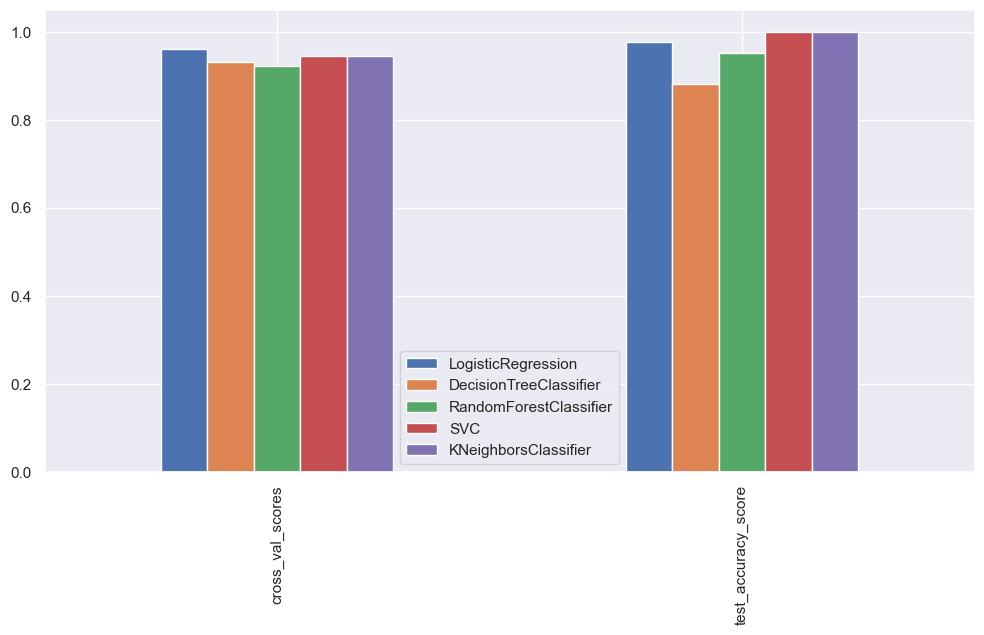

In [249]:
plt.rcParams['figure.figsize'] = (12, 6)
df_sc.plot.bar()


<Axes: >

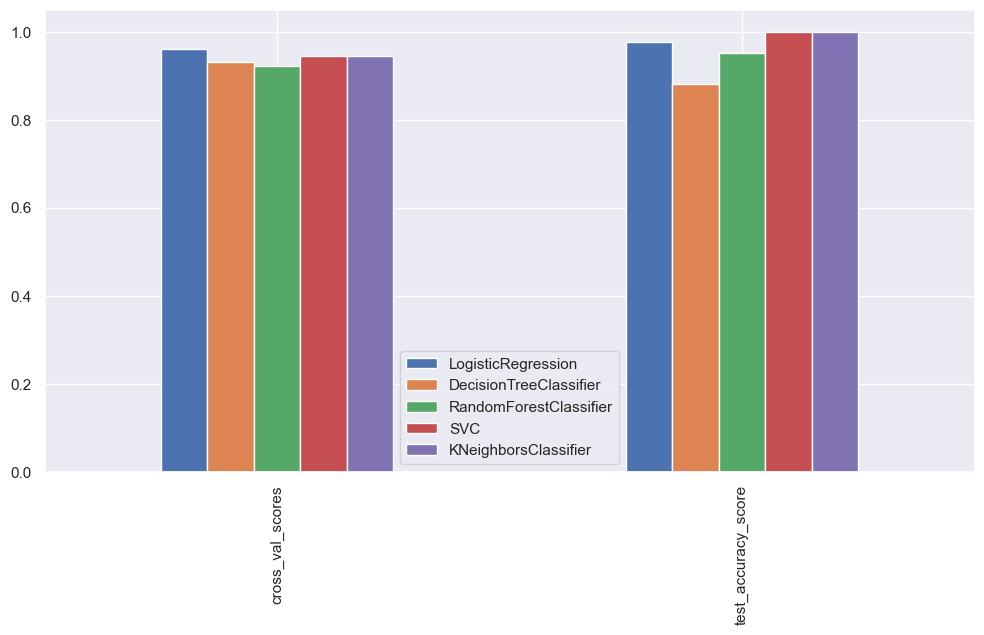

In [250]:
df_sc.plot.bar()

In [251]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [252]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, cv):
    # Train the model using cross-validation on the training set
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv).mean()
    
    # Fit the model on the entire training set
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Compute overall accuracy score on the entire dataset
    overall_accuracy = accuracy_score(y_test, y_pred)
    
    # Generate a classification report
    class_report = classification_report(y_test, y_pred)
    
    # Generate a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix of {model}')
    plt.show()
    
    # Output all the results
    print("Cross-Validation Score:", cv_scores)
    print("Overall Accuracy:", overall_accuracy)
    print("Classification Report:\n", class_report)


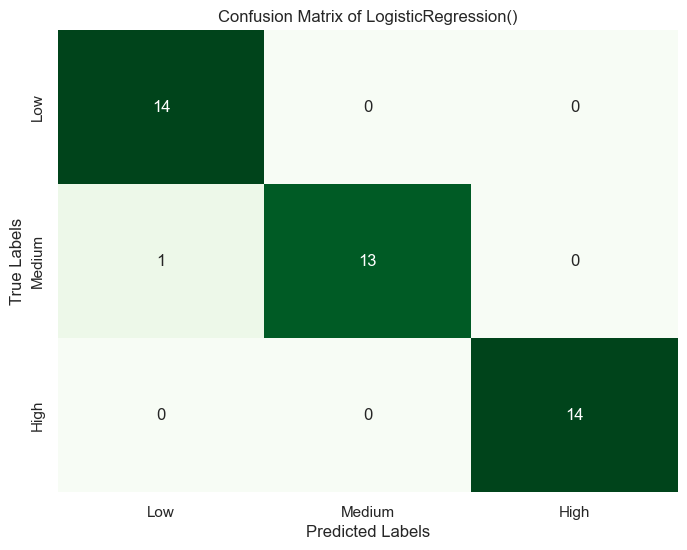

Cross-Validation Score: 0.9615384615384617
Overall Accuracy: 0.9761904761904762
Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        14

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42



In [253]:
train_and_evaluate_model(log_model, X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, 5)

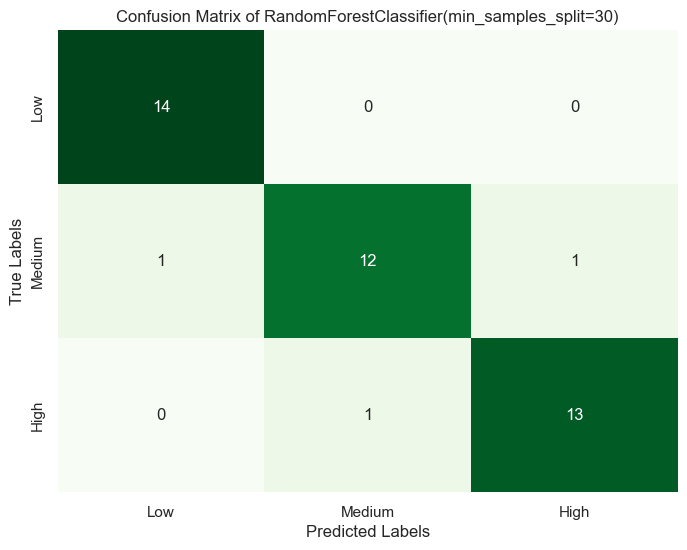

Cross-Validation Score: 0.9150769230769231
Overall Accuracy: 0.9285714285714286
Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.92      0.86      0.89        14
           3       0.93      0.93      0.93        14

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



In [254]:
train_and_evaluate_model(rf_model, X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, 5)

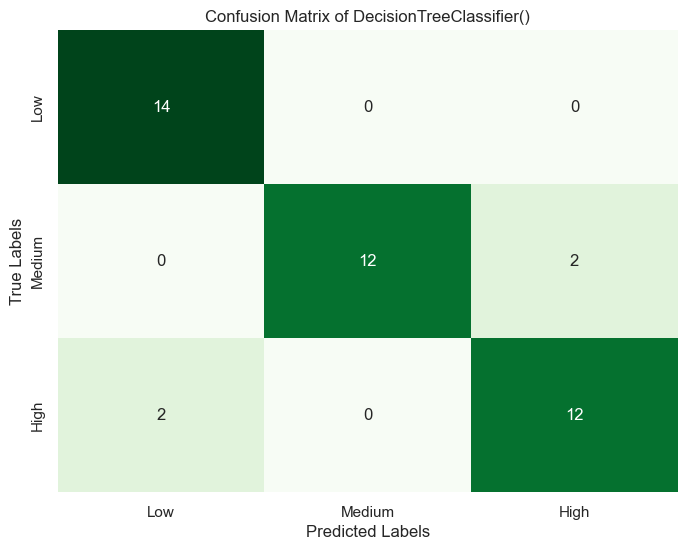

Cross-Validation Score: 0.9304615384615385
Overall Accuracy: 0.9047619047619048
Classification Report:
               precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.86      0.92        14
           3       0.86      0.86      0.86        14

    accuracy                           0.90        42
   macro avg       0.91      0.90      0.90        42
weighted avg       0.91      0.90      0.90        42



In [255]:
train_and_evaluate_model(dt_model, X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, 5)

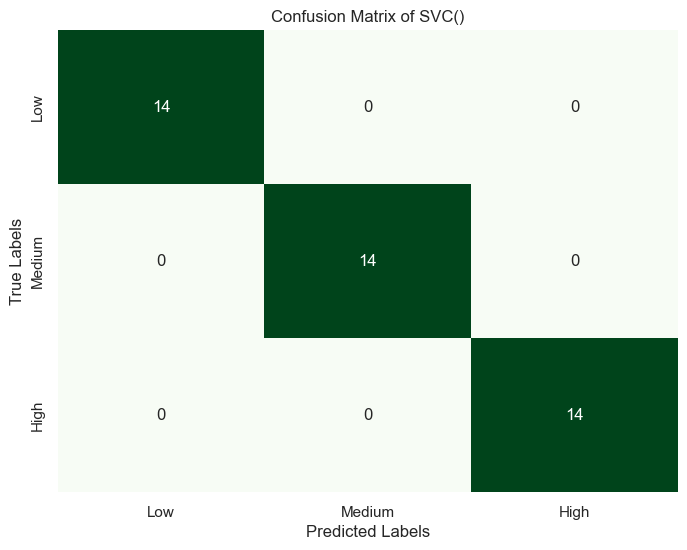

Cross-Validation Score: 0.9458461538461538
Overall Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [256]:
train_and_evaluate_model(svm_model, X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, 5)

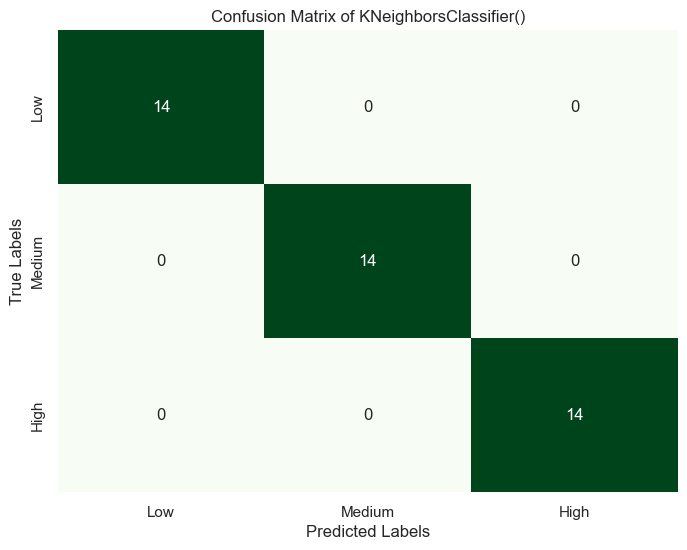

Cross-Validation Score: 0.9458461538461538
Overall Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [257]:
train_and_evaluate_model(knn_model, X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, 5)